In [3]:
import pandas as pd
import geopandas as geo
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

<font size="12"> Data

In [4]:
nat = pd.read_csv("Natural Environment Conditions 2010.csv", index_col = "Neighborhood")
nat

,Sector #,Population (2010),Land Area (acres),Landslide Prone (% land area),Undermined (% land area),Flood Plain (% land area),# Street Trees,Park Space (acres),Park Space (acres/1000 pers.),Park Space (% of land area),Greenway (% of land area),Woodland (% of land area),Cemetery (% of land area),Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
Neighborhood,,,,,,,,,,,,,,,,,
Allegheny Center,3,933,134.40,0.00,0.00,0.16,22,55.264,59.232583,41.12,0.00,0.00,0.00,NaN,NaN,NaN,NaN
Allegheny West,3,462,90.24,9.33,0.00,2.31,229,7.182,15.545455,7.96,0.00,4.24,0.00,NaN,NaN,NaN,NaN
Allentown,6,2500,188.80,27.09,90.35,0.00,87,39.385,15.754000,20.86,0.00,12.31,0.00,NaN,NaN,NaN,100.0
Arlington,7,1869,300.80,41.42,57.25,1.52,79,6.747,3.609952,2.24,0.00,29.43,7.31,NaN,NaN,NaN,NaN
Arlington Heights,7,244,84.48,39.89,61.20,0.00,3,0.000,0.000000,0.00,0.00,41.80,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,13,2669,259.20,13.91,0.00,11.90,246,3.252,1.218434,1.25,0.15,6.44,0.00,NaN,NaN,NaN,NaN
West End,4,254,128.00,16.80,0.00,25.40,108,7.796,30.692913,6.09,0.37,13.22,0.00,NaN,NaN,NaN,NaN
West Oakland,14,2604,137.60,64.53,19.19,0.00,73,1.051,0.403610,0.76,0.00,13.38,0.00,NaN,NaN,NaN,NaN


<font size="12"> Danger

In [5]:
safe1 = nat.groupby("Neighborhood").sum()['Landslide Prone (% land area)']
safe1

Neighborhood
Allegheny Center        0.00
Allegheny West          9.33
Allentown              27.09
Arlington              41.42
Arlington Heights      39.89
                       ...  
Upper Lawrenceville    13.91
West End               16.80
West Oakland           64.53
Westwood               15.24
Windgap                11.03
Name: Landslide Prone (% land area), Length: 90, dtype: float64

In [6]:
safe2 = nat.groupby("Neighborhood").sum()['Undermined (% land area)']
safe2

Neighborhood
Allegheny Center        0.00
Allegheny West          0.00
Allentown              90.35
Arlington              57.25
Arlington Heights      61.20
                       ...  
Upper Lawrenceville     0.00
West End                0.00
West Oakland           19.19
Westwood               79.56
Windgap                 0.00
Name: Undermined (% land area), Length: 90, dtype: float64

In [7]:
safe3 = nat.groupby("Neighborhood").sum()['Flood Plain (% land area)']
safe3

Neighborhood
Allegheny Center        0.16
Allegheny West          2.31
Allentown               0.00
Arlington               1.52
Arlington Heights       0.00
                       ...  
Upper Lawrenceville    11.90
West End               25.40
West Oakland            0.00
Westwood                0.00
Windgap                 2.14
Name: Flood Plain (% land area), Length: 90, dtype: float64

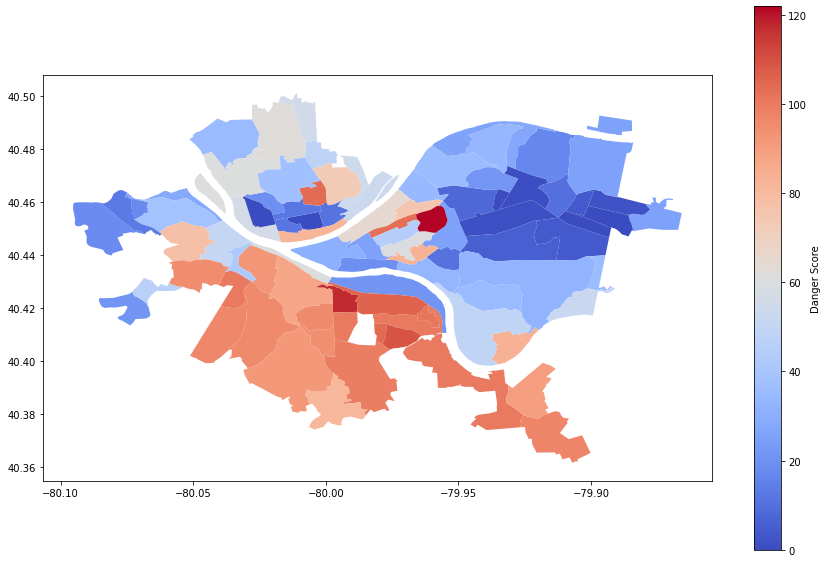

In [8]:
dangscore = pd.concat([safe1, safe2, safe3], axis = 1, join='inner')
dangscore["Danger Score"] = np.nan

for x in range(len(dangscore)):
    dangscore.iloc[x,3] = 0
    for y in range(3):
        dangscore.iloc[x,3] += dangscore.iloc[x,y]

dangchart = dangscore.groupby("Neighborhood").sum()["Danger Score"]
shape = geo.read_file("pittsburgh-pa-neighborhoods.shp")

dangmap = shape.merge(dangchart, how = 'right', left_on='hood', right_on='Neighborhood')
dangmap.plot(column="Danger Score", cmap='coolwarm', figsize=(15,10), legend=True, legend_kwds={'label': "Danger Score"})

In [9]:
dangscore = dangscore.sort_values(by=['Danger Score'], ascending = False)
dangscore

,Landslide Prone (% land area),Undermined (% land area),Flood Plain (% land area),Danger Score
Neighborhood,,,,
Upper Hill,38.51,83.36,0.00,121.87
Allentown,27.09,90.35,0.00,117.44
St. Clair,47.09,61.87,0.11,109.07
South Side Slopes,66.36,39.77,0.00,106.13
Mt. Oliver,9.23,94.71,0.00,103.94
...,...,...,...,...
Allegheny Center,0.00,0.00,0.16,0.16
Manchester,0.00,0.00,0.06,0.06
Friendship,0.00,0.00,0.00,0.00


<font size="12"> Aesthetics

In [10]:
aes1 = nat.groupby("Neighborhood").sum()['Park Space (% of land area)']	
aes1

Neighborhood
Allegheny Center       41.12
Allegheny West          7.96
Allentown              20.86
Arlington               2.24
Arlington Heights       0.00
                       ...  
Upper Lawrenceville     1.25
West End                6.09
West Oakland            0.76
Westwood                3.26
Windgap                 4.38
Name: Park Space (% of land area), Length: 90, dtype: float64

In [11]:
aes2 = nat.groupby("Neighborhood").sum()['Greenway (% of land area)']	
aes2

Neighborhood
Allegheny Center       0.00
Allegheny West         0.00
Allentown              0.00
Arlington              0.00
Arlington Heights      0.00
                       ... 
Upper Lawrenceville    0.15
West End               0.37
West Oakland           0.00
Westwood               0.00
Windgap                0.00
Name: Greenway (% of land area), Length: 90, dtype: float64

In [12]:
aes3 = nat.groupby("Neighborhood").sum()['Woodland (% of land area)']	
aes3

Neighborhood
Allegheny Center        0.00
Allegheny West          4.24
Allentown              12.31
Arlington              29.43
Arlington Heights      41.80
                       ...  
Upper Lawrenceville     6.44
West End               13.22
West Oakland           13.38
Westwood               23.20
Windgap                23.20
Name: Woodland (% of land area), Length: 90, dtype: float64

In [13]:
aes4 = nat.groupby("Neighborhood").sum()['Cemetery (% of land area)']	
aes4

Neighborhood
Allegheny Center       0.00
Allegheny West         0.00
Allentown              0.00
Arlington              7.31
Arlington Heights      0.00
                       ... 
Upper Lawrenceville    0.00
West End               0.00
West Oakland           0.00
Westwood               0.00
Windgap                0.00
Name: Cemetery (% of land area), Length: 90, dtype: float64

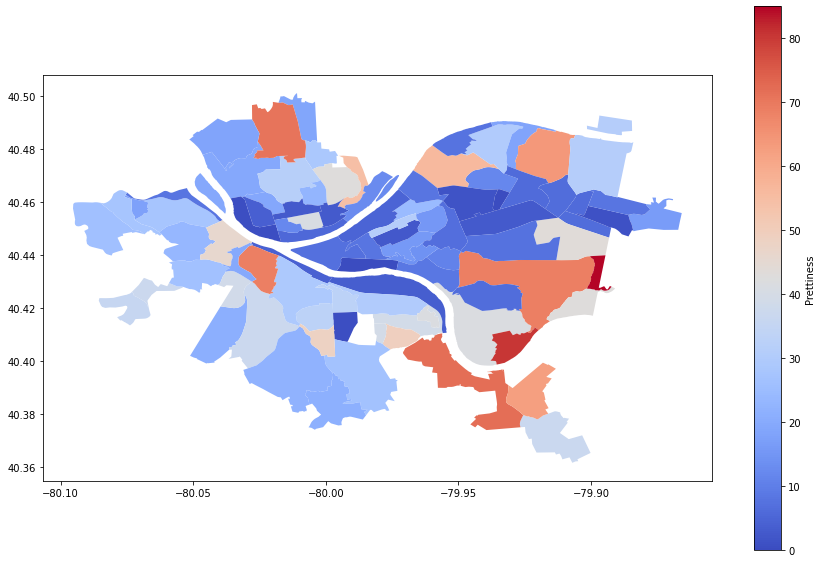

In [14]:
aesscore = pd.concat([aes1,aes2,aes3,aes4], axis = 1, join='inner')
aesscore["Prettiness"] = np.nan

for x in range(len(aesscore)):
    aesscore.iloc[x,4] = 0
    for y in range(4):
        aesscore.iloc[x,4] += aesscore.iloc[x,y]

aeschart = aesscore.groupby("Neighborhood").sum()["Prettiness"]
shape = geo.read_file("pittsburgh-pa-neighborhoods.shp")

aesmap = shape.merge(aeschart, how = 'left', left_on='hood', right_on='Neighborhood')
aesmap.plot(column="Prettiness", cmap='coolwarm', figsize=(15,10), legend=True, legend_kwds={'label': "Prettiness"})

In [15]:
aesscore = aesscore.sort_values(by=['Prettiness'], ascending = False)
aesscore

,Park Space (% of land area),Greenway (% of land area),Woodland (% of land area),Cemetery (% of land area),Prettiness
Neighborhood,,,,,
Regent Square,51.64,0.00,33.32,0.0,84.96
Glen Hazel,0.04,15.89,64.62,0.0,80.55
Hays,0.11,0.00,71.73,0.0,71.84
Perry North,33.34,0.00,37.57,0.0,70.91
Squirrel Hill South,40.05,0.00,28.93,0.0,68.98
...,...,...,...,...,...
Homewood South,1.15,0.00,0.00,0.0,1.15
Chateau,0.65,0.00,0.00,0.0,0.65
Knoxville,0.03,0.00,0.48,0.0,0.51


<font size="12"> Results

In [17]:
danger = dangscore.groupby("Neighborhood").sum()['Danger Score']
aesthetic = aesscore.groupby("Neighborhood").sum()['Prettiness']

danger = -danger

results = pd.concat([danger, aesthetic], axis=1, join='inner')
results["Final Score"] = np.nan

for x in range(len(results)):
    results.iloc[x,2] = 0
    for y in range(2):
        results.iloc[x,2] += results.iloc[x,y]
    
results = results.sort_values(by=['Final Score'], ascending=False)    
results

,Danger Score,Prettiness,Final Score
Neighborhood,,,
Regent Square,-35.47,84.96,49.49
Highland Park,-16.75,63.98,47.23
Allegheny Center,-0.16,41.12,40.96
Point Breeze,-3.81,43.56,39.75
Squirrel Hill South,-32.04,68.98,36.94
...,...,...,...
North Shore,-81.96,5.53,-76.43
Fineview,-103.35,22.81,-80.54
Allentown,-117.44,33.17,-84.27


In [18]:
results.head(10)

,Danger Score,Prettiness,Final Score
Neighborhood,,,
Regent Square,-35.47,84.96,49.49
Highland Park,-16.75,63.98,47.23
Allegheny Center,-0.16,41.12,40.96
Point Breeze,-3.81,43.56,39.75
Squirrel Hill South,-32.04,68.98,36.94
Central Lawrenceville,-35.66,56.19,20.53
East Carnegie,-21.41,35.82,14.41
Windgap,-13.17,27.58,14.41
Perry North,-62.31,70.91,8.60
